In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
pd.set_option('display.max_rows', 20)

In [129]:
latam_df = pd.read_csv("dataset_SCL.csv", dtype= {'Vlo-I': str, 'Vlo-O': str})

<h1>Initial data exploration</h1>

In [130]:
print("Shape of Dataframe:", format(latam_df.shape))
latam_df.head()

Shape of Dataframe: (68206, 18)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,ANO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


Preprocess of the data

General overview of the data

In [131]:
for col in latam_df:
    print("Column:", col, "- Unique values:", len(latam_df[col].unique()))


Column: Fecha-I - Unique values: 53271
Column: Vlo-I - Unique values: 582
Column: Ori-I - Unique values: 2
Column: Des-I - Unique values: 62
Column: Emp-I - Unique values: 31
Column: Fecha-O - Unique values: 62743
Column: Vlo-O - Unique values: 858
Column: Ori-O - Unique values: 2
Column: Des-O - Unique values: 61
Column: Emp-O - Unique values: 33
Column: DIA - Unique values: 32
Column: MES - Unique values: 13
Column: ANO - Unique values: 3
Column: DIANOM - Unique values: 8
Column: TIPOVUELO - Unique values: 3
Column: OPERA - Unique values: 24
Column: SIGLAORI - Unique values: 2
Column: SIGLADES - Unique values: 60


<p>Since Ori-I, ORI-O and SIGLAORI columns just have one unique value, they provide no information, so they get dropped.</p>
<p>Exploring AÑO and TIPOVUELO, we can see that in he case of ANO, the few rows that are not 2017 are flights programmed for 2017, so we drop this column aswell. 
We can drop the 39 columns of NaN in TIPOVUELO since they're filled with NaN fields.</p>
<p> We can also see that there's a clear correlation in SIGLADES and Des-O, since they're basically the same data, so we can drop one of these. In this case, we'll drop SIGLADES. The same can be said for Emp-O and OPERA, so we drop OPERA. </p>

In [165]:
latam_df.drop(labels=['Ori-I','SIGLAORI','ANO','Ori-O','SIGLADES','OPERA'], axis=1,inplace=True)
latam_df.dropna(axis=0, subset=['TIPOVUELO'])

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1.0,1.0,Domingo,I
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2.0,1.0,Lunes,I
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3.0,1.0,Martes,I
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4.0,1.0,Miercoles,I
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5.0,1.0,Jueves,I
...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SPJC,JAT,2017-12-22 15:41:00,400.0,SPJC,JAT,22.0,12.0,Viernes,I
68202,2017-12-25 14:55:00,400,SPJC,JAT,2017-12-25 15:11:00,400.0,SPJC,JAT,25.0,12.0,Lunes,I
68203,2017-12-27 14:55:00,400,SPJC,JAT,2017-12-27 15:35:00,400.0,SPJC,JAT,27.0,12.0,Miercoles,I
68204,2017-12-29 14:55:00,400,SPJC,JAT,2017-12-29 15:08:00,400.0,SPJC,JAT,29.0,12.0,Viernes,I


Now that we dropped the columns that we don't need, we can see the distribution of some of these columns. We're going to pay attention to the most interesting features

<Axes: xlabel='Emp-O', ylabel='count'>

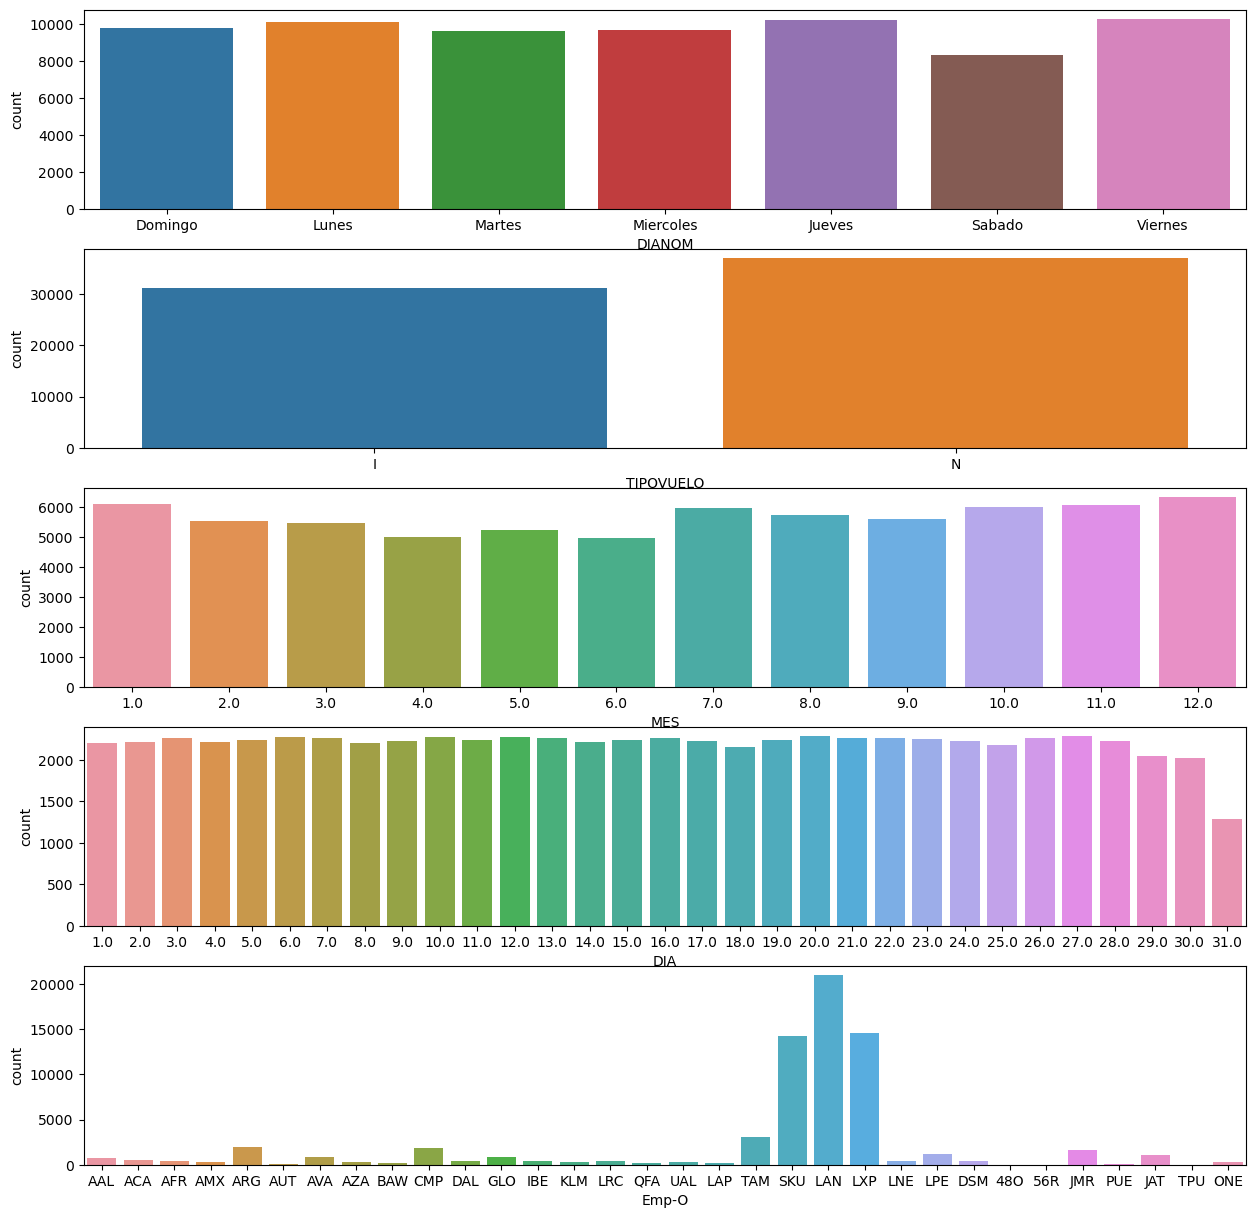

In [170]:
fig, ax =plt.subplots(5,1,figsize=(15, 15))
sns.countplot(x=latam_df["DIANOM"], ax=ax[0])
sns.countplot(x=latam_df["TIPOVUELO"], ax = ax[1])
sns.countplot(x=latam_df["MES"], ax = ax[2])
sns.countplot(x=latam_df["DIA"], ax = ax[3])
sns.countplot(x=latam_df["Emp-O"], ax = ax[4])

We can see that the dataset is quite balanced, except for the Airline that operates, which is heavily skewed towards LAN, SKU and LXP. Which makes a lot of sense considering the Origin Airport is SCEL. This means that the data is very representative of the situation in SCEL airport, so the conclusions drawn from this dataset could apply to real life. 

Note that even though some features seem to be numeric (like month, day), they can be interpreted as categorical, since they have a set amount of values, and higher values do not necessarily mean anything to the model. This applies especially to columns that represent ID's, like Vlo-I or Vlo-O